# 研磨機資料讀取

## Get all using files path

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal 
import scipy.fftpack
#from pylab import *
#from scipy import pi
import pylab
#import cmath
import sys
import tensorflow as tf
#import lvm_read
print(tf.__version__)

2.4.1


In [3]:
# get want using file path
import os
from os import walk
from os.path import join

def data_path(mypath):
    filepath = []
    ae_path = []
    cu_path = []
    ae_path_container = []
    cu_path_container = []
    # 遞迴列出所有檔案的絕對路徑
    for root, dirs, files in walk(mypath):
        for f in files:
            if f.find("AEdate") >= 0: ae_path.append(f)
            elif f.find("Current") >= 0: cu_path.append(f)
#             elif f.find(".csv") >=0: equ_path = f
        ae_path.sort(key = lambda x: int(x[7:-4]))
        cu_path.sort(key = lambda x: int(x[8:-4]))
        for class_ in ae_path:
            files_path = os.path.join(root, class_)           
            ae_path_container.append(files_path)
        for class_ in cu_path:
            files_path = os.path.join(root, class_)           
            cu_path_container.append(files_path)
#         equ_path_container = equ_path
    return ae_path_container

In [8]:
Datapath = "/media/a00439/2C167E66167E30C6/AE_data/20180104 正常砂輪研磨/第二次研磨/AEdata_n"
data1 = data_path(Datapath)
print('data :',np.array(data1).shape)


data : (310,)


In [73]:
import os
from os import walk
from os.path import join

train_datasetpaths = "/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset"


# for dirpath,dirnames,filenames in walk(folderpath):
#     print(dirpath)
train_folders = os.listdir(train_datasetpaths)      # find under this path all folders
print('Experimental data folders: {}'.format(train_folders))
print('Number of experimental folders: {}'.format(len(train_folders)))

for i in (train_folders):
    print(i)

ae_datapath = os.path.join(train_datasetpaths, train_folders[0], 'AE_data')
print(ae_datapath)
aedata_files = os.listdir(ae_datapath)
aedata_files.sort(key = lambda x: int(x[7:-4]))  # defined order
aedata_files

Experimental data folders: ['exp1', 'exp2']
Number of experimental folders: 2
exp1
exp2
/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp1/AE_data


['AEdate_25.lvm',
 'AEdate_26.lvm',
 'AEdate_27.lvm',
 'AEdate_28.lvm',
 'AEdate_29.lvm',
 'AEdate_30.lvm',
 'AEdate_31.lvm',
 'AEdate_32.lvm',
 'AEdate_33.lvm',
 'AEdate_34.lvm',
 'AEdate_35.lvm',
 'AEdate_36.lvm',
 'AEdate_37.lvm',
 'AEdate_38.lvm',
 'AEdate_39.lvm',
 'AEdate_40.lvm',
 'AEdate_41.lvm',
 'AEdate_42.lvm',
 'AEdate_43.lvm',
 'AEdate_44.lvm',
 'AEdate_45.lvm',
 'AEdate_46.lvm',
 'AEdate_47.lvm',
 'AEdate_48.lvm',
 'AEdate_49.lvm',
 'AEdate_50.lvm',
 'AEdate_51.lvm',
 'AEdate_52.lvm',
 'AEdate_53.lvm',
 'AEdate_54.lvm',
 'AEdate_55.lvm',
 'AEdate_56.lvm',
 'AEdate_57.lvm',
 'AEdate_58.lvm',
 'AEdate_59.lvm',
 'AEdate_60.lvm',
 'AEdate_61.lvm',
 'AEdate_62.lvm',
 'AEdate_63.lvm',
 'AEdate_64.lvm',
 'AEdate_65.lvm',
 'AEdate_66.lvm',
 'AEdate_67.lvm',
 'AEdate_68.lvm',
 'AEdate_69.lvm',
 'AEdate_70.lvm',
 'AEdate_71.lvm',
 'AEdate_72.lvm',
 'AEdate_73.lvm',
 'AEdate_74.lvm',
 'AEdate_75.lvm',
 'AEdate_76.lvm',
 'AEdate_77.lvm',
 'AEdate_78.lvm',
 'AEdate_79.lvm',
 'AEdate_8

In [70]:
import os
from os.path import join
import tensorflow as tf


train_datasetpaths = "/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset"
folderpath_tfrecord = []
train_folders = os.listdir(train_datasetpaths)
for i, folderpath in enumerate(train_folders):
    with tf.io.TFRecordWriter(folderpath) as f:
        ae_filespath = os.path.join(train_datasetpaths, folderpath, 'AE_data')
        aedata_files = os.listdir(ae_filespath)
        aedata_files.sort(key = lambda x: int(x[7:-4]))  # defined order
        for j in aedata_files:
            aedata_everypaths = os.path.join(ae_filespath, j)
            f.write(aedata_everypaths.encode("utf-8"))

ae_dataset = tf.data.TFRecordDataset(train_folders, num_parallel_reads=1)
for item in ae_dataset.take(10):
    print(item)

tf.Tensor(b'/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp1/AE_data/AEdate_25.lvm', shape=(), dtype=string)
tf.Tensor(b'/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp1/AE_data/AEdate_26.lvm', shape=(), dtype=string)
tf.Tensor(b'/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp1/AE_data/AEdate_27.lvm', shape=(), dtype=string)
tf.Tensor(b'/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp1/AE_data/AEdate_28.lvm', shape=(), dtype=string)
tf.Tensor(b'/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp1/AE_data/AEdate_29.lvm', shape=(), dtype=string)
tf.Tensor(b'/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp1/AE_data/AEdate_30.lvm', shape=(), dtype=string)
tf.Tensor(b'/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp1/AE_data/AEdate_31.lvm', shape=(), dtype=string)
tf.Tensor(b'/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp1/

In [21]:
# ae_path_container = []
# for item in aedataset:
#     ae_path_container.append(item.numpy())
# ae_path_container[0]

    
n_readers = 1
dataset = ae_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(23),
    cycle_length=n_readers)

# for item in dataset.take(2):
#     print(item)

for item in ae_dataset.take(1):
    print(item)
    testdata = tf.data.TextLineDataset(item).skip(23)
#     testdata = testdata.flat_map(testdata)
# for i in testdata.take(2):
#     print(i)

#     testdata1 = testdata.as_numpy_iterator()

#     files = tf.io.decode_raw(testdata1, tf.float32)

# def flat_data(data1):
#     return data1[:-label_length], data1[-label_length]

tf.Tensor(b'/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp1/AE_data/AEdate_25.lvm', shape=(), dtype=string)


In [22]:
import pandas as pd
# testpath = '/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp1/AE_data/AEdate_25.lvm'
filename = str(ae_path_container[0])[2:-1]
# dt_loading = pd.read_fwf(testpath, widths=[10])[21:5000021]

NameError: name 'ae_path_container' is not defined

In [66]:
filepaths = '/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp1/AE_data/AEdate_25.lvm'
dataset = tf.data.Dataset.list_files(filepaths)
# dataset = dataset.interleave(
#         lambda filepath: tf.data.TextLineDataset(filepath).skip(23),
#         cycle_length=1, num_parallel_calls=1)

data11 = tf.data.TextLineDataset(filepaths).skip(23)
for i in data11.take(5):
    print(i)
    

# for i in dataset.take(5):
#     print(i)

# dataset = dataset.flat_map(lambda x: Dataset.from_tensor_slices(x))


# def preprocess_(filepaths):
#     dt_loading = pd.read_fwf(filepaths, widths=[10])[21:5000021]
#     dt_tartype = np.array(dt_loading, dtype = np.float32)
#     ae_rawdata = dt_tartype.ravel()
#     return ae_rawdata[:10]

# dataset = dataset.interleave(
#         lambda filepath: tf.data.from_tensor_slices(filepath),
#         cycle_length=1, num_parallel_calls=1)




tf.Tensor(b'\t0.080566', shape=(), dtype=string)
tf.Tensor(b'\t-0.156250', shape=(), dtype=string)
tf.Tensor(b'\t-0.280762', shape=(), dtype=string)
tf.Tensor(b'\t-0.156250', shape=(), dtype=string)
tf.Tensor(b'\t0.061035', shape=(), dtype=string)


## Test `Read .lvm file data` 

Text(0, 0.5, 'volt')

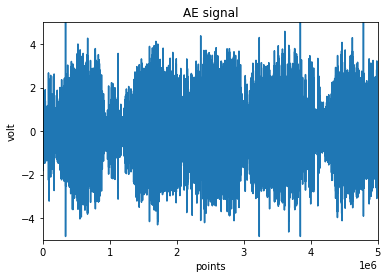

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import math
import matplotlib.pyplot as plt

filepaths = '/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp1/AE_data/AEdate_25.lvm'
dt_loading = pd.read_fwf(filepaths, widths=[10])[21:5000021]
dt_loading = np.array(dt_loading, dtype = np.float32)
dt_loading = dt_loading.ravel()
ae_data = dt_loading - dt_loading.mean()

plt.plot(ae_data)
plt.xlim(0,5000000)
plt.ylim(-5,5)
plt.title("AE signal")
plt.xlabel("points")
plt.ylabel("volt")

tf.signal.stft(
    signals, frame_length, frame_step, fft_length=None,
    window_fn=tf.signal.hann_window, pad_end=False, name=None
)

## Setup
### Import necessary modules and dependencies.
* https://www.tensorflow.org/tutorials/audio/simple_audio

In [1]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import pandas as pd

In [2]:
train_datasetpaths = "/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset"
folderpath_tfrecord = []
train_folders = os.listdir(train_datasetpaths)
for i, folderpath in enumerate(train_folders):
        ae_filespath = os.path.join(train_datasetpaths, folderpath, 'AE_data')
        aedata_files = os.listdir(ae_filespath)
        aedata_files.sort(key = lambda x: int(x[7:-4]))  # defined order
        for j in aedata_files:
            folderpath_tfrecord.append(os.path.join(ae_filespath, j))

### Import the Acoustic Emission dataset

In [2]:
# data_dir = pathlib.Path('/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset')
# data_dir

PosixPath('/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset')

In [3]:
Test Read .lvm file data¶# filenames = tf.io.gfile.glob(str(data_dir) + '/*/AE_data/*')
# num_samples = len(filenames)
# print('Number of total examples:', num_samples)
# print('Example file tensor:', filenames[0])

Number of total examples: 667
Example file tensor: /media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp2/AE_data/AEdate_1.lvm


In [3]:
# train_files = filenames[:600]
# val_files = filenames[600: 600 + 30]
# test_files = filenames[-30:]

print('Training set size', len(folderpath_tfrecord))
# print('Validation set size', len(val_files))
# print('Test set size', len(test_files))

Training set size 667


### Reading Acoustic Emission raw data files

In [4]:
def decode_ae(ae_binary):
    raw_data = tf.strings.split(ae_binary)[43:]
    raw_data = tf.strings.to_number(raw_data, out_type=tf.dtypes.float32, name=None )
    raw_data = raw_data - tf.math.reduce_mean(raw_data)
    return raw_data

In [5]:
def get_waveform(file_path):
    raw_data = tf.io.read_file(file_path)
    raw_data = decode_ae(raw_data)
    return raw_data

In [6]:
AUTOTUNE = tf.data.AUTOTUNE
files_ds = tf.data.Dataset.from_tensor_slices(folderpath_tfrecord)
waveform_ds = files_ds.map(get_waveform, num_parallel_calls=AUTOTUNE)

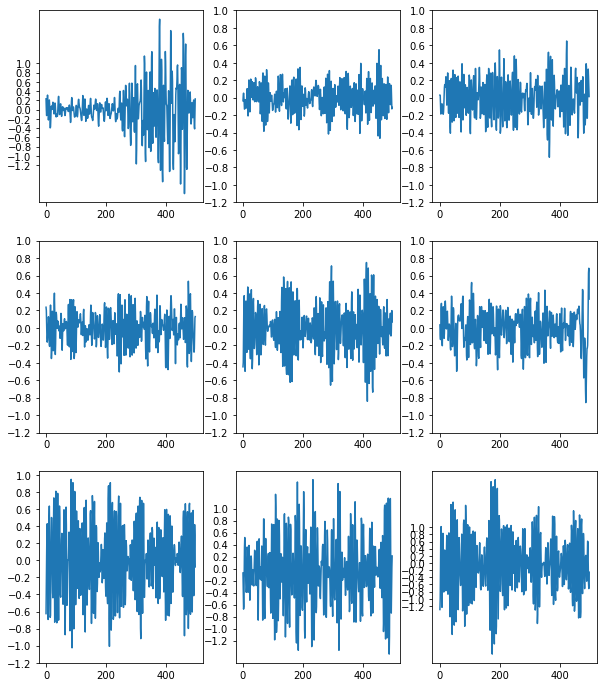

In [7]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
for i, (ae) in enumerate(waveform_ds.take(n)):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    ax.plot(ae[:500].numpy())
    ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
#     label = label.numpy().decode('utf-8')
#     ax.set_title(label)

plt.show()

### Spectrogram

In [8]:
def get_spectrogram(waveform):
ae
  # Concatenate audio with padding so that all audio clips will be of the 
  # same length
    waveform = tf.cast(waveform, tf.float32)
    spectrogram = tf.signal.stft(
        waveform, frame_length=4096,frame_step=2048, fft_length=4096,
        window_fn=tf.signal.hann_window, pad_end=False, name=None)

    spectrogram = tf.abs(spectrogram)

    return spectrogram


In [9]:
for waveform in waveform_ds.take(1):
    spectrogram = get_spectrogram(waveform)

print('Waveform shape:', waveform.shape)
print('Spectrogram shape:', spectrogram.shape)

Waveform shape: (5000000,)
Spectrogram shape: (2440, 2049)


/home/a00439/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


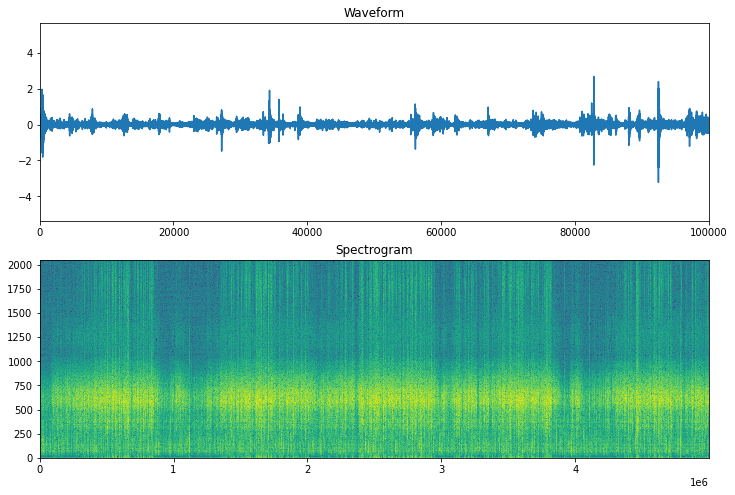

In [10]:
def plot_spectrogram(spectrogram, ax):
  # Convert to frequencies to log scale and transpose so that the time is
  # represented in the x-axis (columns).
    log_spec = np.log(spectrogram.T)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X, Y, log_spec)


fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 100000])
plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

In [11]:
def get_spectrogram_and_label_id(ae):
    spectrogram = get_spectrogram(ae)
#     spectrogram = tf.expand_dims(spectrogram, -1)
    
    return spectrogram

In [12]:
aespectrogram_ds = waveform_ds.map(
    get_spectrogram_and_label_id, num_parallel_calls=AUTOTUNE)

/home/a00439/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


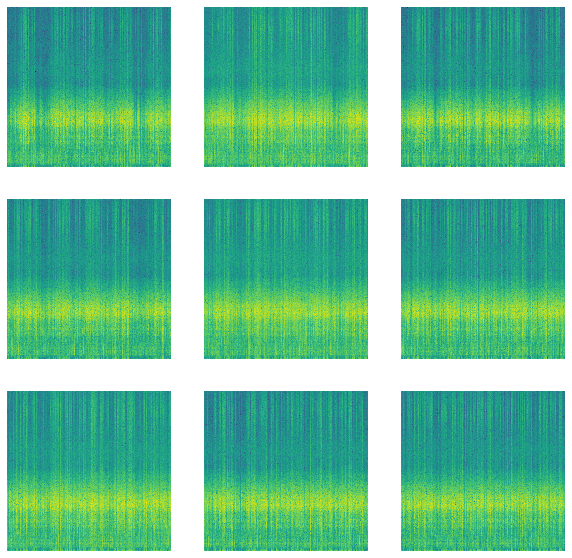

In [13]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
for i, (spectrogram) in enumerate(spectrogram_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  plot_spectrogram(np.squeeze(spectrogram.numpy()), ax)
#   ax.set_title(commands[label_id.numpy()])
  ax.axis('off')

plt.show()

##  Read ` Current .lvm file data` 

In [1]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import pandas as pd

In [2]:
train_datasetpaths = "/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset"
folderpath_tfrecord = []
train_folders = os.listdir(train_datasetpaths)
for i, folderpath in enumerate(train_folders):
        ae_filespath = os.path.join(train_datasetpaths, folderpath, 'Vib_data')
        aedata_files = os.listdir(ae_filespath)
        aedata_files.sort(key = lambda x: int(x[8:-4]))  # defined order
        for j in aedata_files:
            folderpath_tfrecord.append(os.path.join(ae_filespath, j))

In [3]:
print('Training set size', len(folderpath_tfrecord))
folderpath_tfrecord[0]

Training set size 667


'/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp1/Vib_data/Current_25.lvm'

In [4]:
raw_data = tf.io.read_file(folderpath_tfrecord[0])
raw_data = tf.strings.split(raw_data)[74:]
print(raw_data.shape)
raw_data = tf.reshape(raw_data, [-1, 5])
print(raw_data.shape)

(50000,)
(10000, 5)


In [5]:
raw_data[:10, 1]

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b'-0.581516', b'-0.735841', b'-0.697588', b'-0.677395',
       b'-0.680842', b'-0.773437', b'-0.577576', b'-0.587591',
       b'-0.604337', b'-0.606799'], dtype=object)>

In [6]:
def decode_ae(ae_binary):
    raw_data = tf.strings.split(ae_binary)[74:]
    raw_data = tf.reshape(raw_data, [-1, 5])
    raw_data = raw_data[:, -1]
    raw_data = tf.strings.to_number(raw_data, out_type=tf.dtypes.float32, name=None )
    raw_data = raw_data - tf.math.reduce_mean(raw_data)
    return raw_data

In [7]:
def get_waveform(file_path):
    raw_data = tf.io.read_file(file_path)
    raw_data = decode_ae(raw_data)
    return raw_data

In [8]:
AUTOTUNE = tf.data.AUTOTUNE
files_ds = tf.data.Dataset.from_tensor_slices(folderpath_tfrecord)
waveform_ds = files_ds.map(get_waveform, num_parallel_calls=AUTOTUNE)

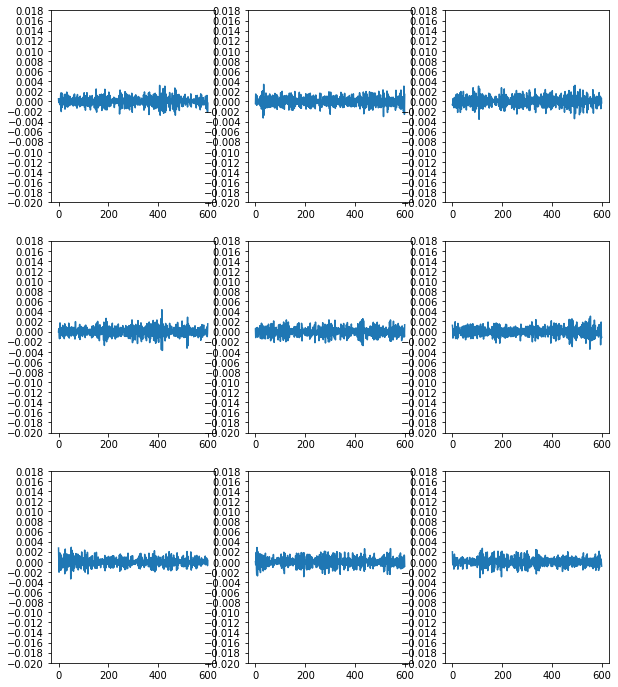

In [22]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
for i, (vi) in enumerate(waveform_ds.take(n)):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    ax.plot(vi[:600].numpy())
    ax.set_yticks(np.arange(-0.02, 0.02, 0.002))
#     label = label.numpy().decode('utf-8')
#     ax.set_title(label)

plt.show()

In [25]:
def get_spectrogram(waveform):
  # Concatenate audio with padding so that all audio clips will be of the 
  # same length
    waveform = tf.cast(waveform, tf.float32)
    spectrogram = tf.signal.stft(
        waveform, frame_length=256,frame_step=128, fft_length=256,
        window_fn=tf.signal.hann_window, pad_end=False, name=None)

    spectrogram = tf.abs(spectrogram)

    return spectrogram


In [26]:
for waveform in waveform_ds.take(1):
    spectrogram = get_spectrogram(waveform)

print('Waveform shape:', waveform.shape)
print('Spectrogram shape: (taxis, faxis)', spectrogram.shape)

Waveform shape: (10000,)
Spectrogram shape: (taxis, faxis) (77, 129)


/home/a00439/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


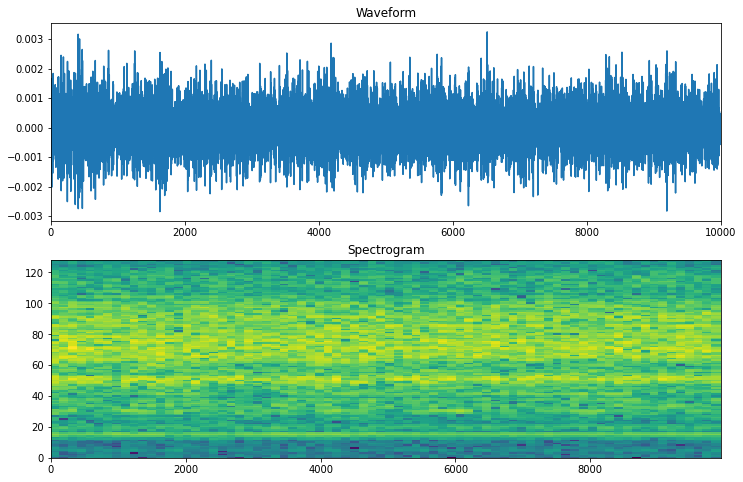

In [27]:
def plot_spectrogram(spectrogram, ax):
  # Convert to frequencies to log scale and transpose so that the time is
  # represented in the x-axis (columns).
    log_spec = np.log(spectrogram.T)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X, Y, log_spec)


fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 10000])
plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

In [28]:
def get_spectrogram_and_label_id(ae):
    spectrogram = get_spectrogram(ae)
#     spectrogram = tf.expand_dims(spectrogram, -1)
    
    return spectrogram

In [31]:
spectrogram_ds = waveform_ds.map(
    get_spectrogram_and_label_id, num_parallel_calls=AUTOTUNE)

/home/a00439/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


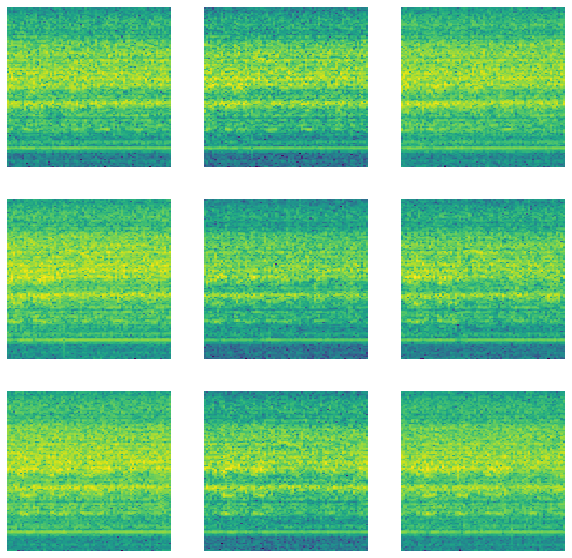

In [32]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
for i, (spectrogram) in enumerate(spectrogram_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  plot_spectrogram(np.squeeze(spectrogram.numpy()), ax)
#   ax.set_title(commands[label_id.numpy()])
  ax.axis('off')

plt.show()

## Read Eqp_data `.csv file`

In [1]:
import os
from os.path import join
import tensorflow as tf


train_datasetpaths = "/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset"
folderpath_tfrecord = []
train_folders = os.listdir(train_datasetpaths)
for i, folderpath in enumerate(train_folders):
    with tf.io.TFRecordWriter(folderpath) as f:
        eqp_filespath = os.path.join(train_datasetpaths, folderpath, 'Eqp_data')
        eqp_files = os.listdir(eqp_filespath)
        for j in eqp_files:
            eqpdata_everypaths = os.path.join(eqp_filespath, j)
            f.write(eqpdata_everypaths.encode("utf-8"))

eqp_filepath_dataset = tf.data.TFRecordDataset(train_folders, num_parallel_reads=1)
for item in eqp_filepath_dataset:
    print(item)

tf.Tensor(b'/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp1/Eqp_data/20180104_104852_eqpdata.csv', shape=(), dtype=string)
tf.Tensor(b'/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp2/Eqp_data/20180104_145012_eqpdata.csv', shape=(), dtype=string)


In [2]:
n_readers = 1
eqp_dataset = eqp_filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath),
    cycle_length=n_readers)

for line in eqp_dataset.take(5):
    print(line.numpy())

b'1,1000,60,0.06,0.347,0,0,5,0,2,  98.5300,0.547,2018/01/04 10:37:10,BSG0001'
b'2,1000,60,0.06,0.347,0,0,8,30,2,  98.5300,0.547,2018/01/04 10:37:11,BSG0001'
b'3,1000,60,0.06,0.347,0,0,5,30,2,  98.5300,-0.029,2018/01/04 10:37:12,BSG0001'
b'4,1000,60,0.06,0.347,0,0,6,30,2,  98.5300,-0.029,2018/01/04 10:37:13,BSG0001'
b'5,1000,60,0.06,0.347,0,0,6,29,2,  98.5300,-0.029,2018/01/04 10:37:14,BSG0001'


### Preprocess Eqpdata

In [3]:
n_inputs = 12
def _perprocess_eqpdata(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.string)] + [tf.constant([], dtype=tf.string)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-2])
    y = tf.stack(fields[-2])
    return x,y

eqp_data, data_time = _perprocess_eqpdata(b'1,1000,60,0.06,0.347,0,0,5,0,2,  98.5300,0.547,2018/01/04 10:37:10,BSG0001')
print(eqp_data[-2].numpy())

98.53


In [4]:
for line in eqp_dataset.take(5):
#     print(line.numpy())
    eqp_data, data_time = _perprocess_eqpdata(line)
    print('Eqp data: {}, Eqp time: {}'.format(eqp_data, data_time))


Eqp data: [1.000e+00 1.000e+03 6.000e+01 6.000e-02 3.470e-01 0.000e+00 0.000e+00
 5.000e+00 0.000e+00 2.000e+00 9.853e+01 5.470e-01], Eqp time: b'2018/01/04 10:37:10'
Eqp data: [2.000e+00 1.000e+03 6.000e+01 6.000e-02 3.470e-01 0.000e+00 0.000e+00
 8.000e+00 3.000e+01 2.000e+00 9.853e+01 5.470e-01], Eqp time: b'2018/01/04 10:37:11'
Eqp data: [ 3.000e+00  1.000e+03  6.000e+01  6.000e-02  3.470e-01  0.000e+00
  0.000e+00  5.000e+00  3.000e+01  2.000e+00  9.853e+01 -2.900e-02], Eqp time: b'2018/01/04 10:37:12'
Eqp data: [ 4.000e+00  1.000e+03  6.000e+01  6.000e-02  3.470e-01  0.000e+00
  0.000e+00  6.000e+00  3.000e+01  2.000e+00  9.853e+01 -2.900e-02], Eqp time: b'2018/01/04 10:37:13'
Eqp data: [ 5.000e+00  1.000e+03  6.000e+01  6.000e-02  3.470e-01  0.000e+00
  0.000e+00  6.000e+00  2.900e+01  2.000e+00  9.853e+01 -2.900e-02], Eqp time: b'2018/01/04 10:37:14'


In [5]:
# Combine above functins
import os
from os.path import join
import tensorflow as tf

n_inputs = 12
def _perprocess_eqpdata(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.string)] + [tf.constant([], dtype=tf.string)] # define dataset configure
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-2])
    y = tf.stack(fields[-2])
    return x,y


def csv_reader_eqpdataset(filepaths, repeat=1, n_readers=1,
                         n_read_threads=None, shuffle_buffer_size=10000,
                         n_parse_threads=1, batch_size=1):
    eqp_dataset = tf.data.Dataset.list_files(filepaths)
    eqp_dataset = eqp_dataset.interleave(
            lambda filepath: tf.data.TextLineDataset(filepath),
            cycle_length=n_readers, num_parallel_calls=n_read_threads)
    eqp_dataset = eqp_dataset.map(lambda x:_perprocess_eqpdata(x), num_parallel_calls=n_read_threads)
    
    return eqp_dataset.batch(batch_size).prefetch(1)


In [6]:
# print Eqp data result
for item in eqp_filepath_dataset:
    print(item)
    eqpdata1= csv_reader_eqpdataset(item)
    for element in eqpdata1.take(2):
        eqpdata, eqptime = element
        print('Eqp data: {}'.format(eqpdata))
        print('Eqp time: {}'.format(eqptime))
        print('')

tf.Tensor(b'/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp1/Eqp_data/20180104_104852_eqpdata.csv', shape=(), dtype=string)
Eqp data: [[1.000e+00 1.000e+03 6.000e+01 6.000e-02 3.470e-01 0.000e+00 0.000e+00
  5.000e+00 0.000e+00 2.000e+00 9.853e+01 5.470e-01]]
Eqp time: [b'2018/01/04 10:37:10']

Eqp data: [[2.000e+00 1.000e+03 6.000e+01 6.000e-02 3.470e-01 0.000e+00 0.000e+00
  8.000e+00 3.000e+01 2.000e+00 9.853e+01 5.470e-01]]
Eqp time: [b'2018/01/04 10:37:11']

tf.Tensor(b'/media/a00439/2C167E66167E30C6/For_test_read_AEdata/train_dataset/exp2/Eqp_data/20180104_145012_eqpdata.csv', shape=(), dtype=string)
Eqp data: [[1.0000e+00 1.0000e+03 6.0000e+01 6.0000e-02 1.5500e-01 0.0000e+00
  0.0000e+00 6.0000e+00 0.0000e+00 3.0000e+00 9.8537e+01 0.0000e+00]]
Eqp time: [b'2018/1/4 14:40:10']

Eqp data: [[2.0000e+00 1.0000e+03 6.0000e+01 6.0000e-02 1.5500e-01 0.0000e+00
  0.0000e+00 5.0000e+00 3.0000e+01 3.0000e+00 9.8537e+01 0.0000e+00]]
Eqp time: [b'2018/1/4 14:40:11']



In [88]:
# try to calculating different of the thickness data
# print Eqp data result
# def calc_diff_thic(eqpdata):
#     for elements in eqpdata:
#         data1, data2 = elements
#         for i in data1:
#             print(i)
eqpthic_container = []
for elements in eqpdata:
    eqpthic = elements[-2]
    eqpnum = elements[0]

print('eqpthic: {}, eqpnum: {}'.format(eqpthic, eqpnum))


eqpthic: 98.53700256347656, eqpnum: 2.0
